The purpose of this notebook is to validate our vehicle design via caluculations of rollover and load transfer. In addition, the effects of load transfer on static analysis and subsequent load conditions for FEA. 

<h><center>Track Width and Wheel Base Model</center></h> 

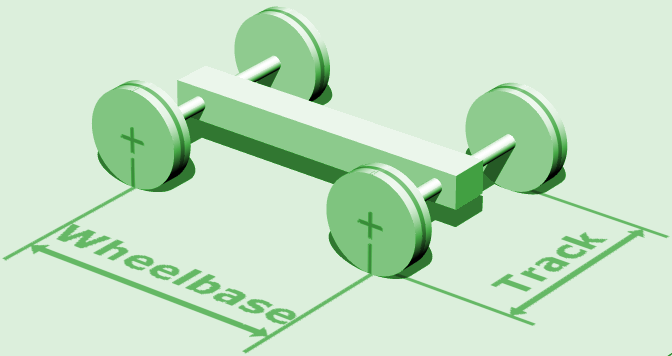

In [27]:
# Parameters for the Vehicle (can be editable)
# All units are in SI (mm,N)

# Must be able to handle (theoretically) 1.1 g 
tire_radius = .2032 # [m]
vehicle_track_width = 0.800 # [m]
vehicle_wheelbase = 2.200 # [m]
weight_distribution_front = 0.52 #60% front 
weight_distribution_back = 0.48 #40% rear 
max_vehicle_weight = 600 # [lbf]
CG_height = .359 #[m], vertical location for center of gravity .43266 -> current CG height 
# target height ~ 0.4 m 
weight_SI = 0.45359237 * max_vehicle_weight * 9.81
Fn_front_wheel = weight_SI * weight_distribution_front * 0.5 # force normal for each front wheel 
Fn_back_wheel = weight_SI * weight_distribution_back * 0.5 # force normal for each rear wheel 
print(Fn_front_wheel)

694.1596193532


Below are Concepts from Race Car Vehicle Dynamics - Miliken 

<h><center>Lateral Load Transfer</center></h>

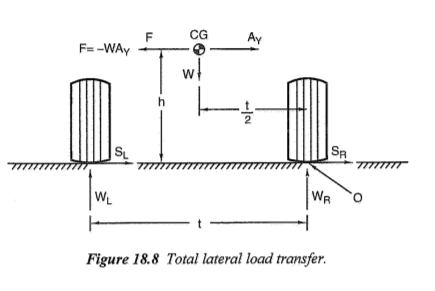

<h><center>Lateral Load Transfer will occur when the vehicle turning. Per ASC regulations, the vehicle must be able to handle a 1G turning load.</center></h>


Understanding the Model: 

Under steady conditions, the car will experience an internal reaction force called the centrifugal force when turning. This centrifugal froce opposes the lateral acceleration produced by the tire cornering force. The cornering force SL and SR will produce a lateral acceleration Ay (in terms of g's). The centrifugal force WAy is opposing this lateral acceleration. 

Let's take the Moment at Point O: 

$ (WL*t) = (W*\frac{t}{2}) + (WAy*h) $

$ WL = \frac{(W*\frac{t}{2}) + (WAy*h)}{t}$

$ \Delta W = WL - (W*\frac{1}{2}) =  \frac{(WAy*h)}{t}$

In [28]:
# Calculations for 1G Turning (Right)

# Parameters 
t = vehicle_track_width
h = CG_height 
Ay = 1 #[g]
W = weight_SI
# Calculations 
WL = ((W * (t/2)) + (W * Ay * h))/(t) 
print("WL [N]:",WL)
delta_W = WL - (W * 0.5)
print("Delta W:",delta_W)
# WL is the total load transfer on left side, does not account for load on each individual wheel
# delta_W is the change in load transfer on each side, increases on left side and decreases on right side! FOR TURNING RIGHT, vice versa for left turning 
# Determine the Load on Each Side 
WL_left = (W/2) + delta_W
WR_right = (W/2) - delta_W 
print("Weight SI (N):",W)
print('Left Side Load [N]:',WL_left)
print('Right Side Load [N]:',WR_right)
if W < WL: 
    print("Rollover will occur!")
else:
    print("No Rollover!")

WL [N]: 2533.015149466725
Delta W: 1198.0928045567248
Weight SI (N): 2669.84468982
Left Side Load [N]: 2533.015149466725
Right Side Load [N]: 136.8295403532752
No Rollover!


<h><center>Longitudinal Load Transfer</center></h>

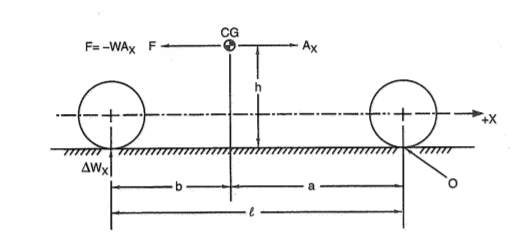

<h><center>Longitudinal Load Transfer will occur in the event of braking or acceleration of the vehicle. Based on ASC regulations, the car must be able to handle braking of 1G.</cneter></h>

Understanding the Model: 

During either positive acceleration (driving acceleration, ax) or negative acceleration (braking acceleration, -ax), there is a reactive force in the form of inertial forces. 

Taking moment at point O:

$ \triangle W_{x}*l = WA_{x}*h $ 

$ \triangle W_{x} = \frac{(WA_{x}*h)}{l}$


In [29]:
# Calculations for 1G Braking 

# Parameters 
a = vehicle_wheelbase*(1-weight_distribution_front) #[m]
b = vehicle_wheelbase*(1-weight_distribution_back) #[m]
l = a+b #[mm]
Ax = 1 #[g]
W =  weight_SI
g = 9.81 # gravity 

#Calculations 

delta_Wx = (W*Ax*h)/l

print("Total Load Transfer for 1G Braking [N]:",delta_Wx)
# The front axle has an increased load for 1G braking, decreased for rear axle
# The rear axle has an increased load for 1G acceleration, decreased for front axle

Total Load Transfer for 1G Braking [N]: 435.6701107478999


Below are Concepts from "Physics of Automobile Roller" by L. David Roper

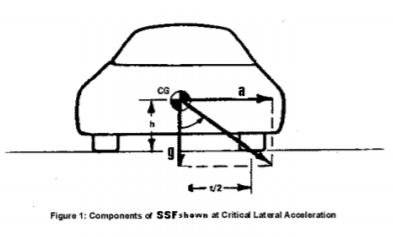

The figure above illustrates the SSF or Static Stability Factor. 

The SSF Factor is essentially: 
- one half the track width divided by the height of the center of gravity 
- "static" b/c SSF is the tangent of the slope angle for a vehicle to just roll over while sitting on the slope 

$ tan(\theta) = \frac {a}{g}$

$ SSF = tan(\theta) = \frac {\frac{t}{2}}{h} = \frac{F_{l}}{F_{g}} = \frac{a}{g}$

Therefore: 

$ a = g*SSF $

We want a large enough SSF value so that the lateral acceleration required to cause a rollover would also be large. 

There are two types of moving rollover situations: 

1 - vehicle is sliding sideways and strikes an obstacle, providing a pivot point 

2- vehicle is moving without slipping, around a circular curve at a constant speed high enough to cause a rollover. Rollover occurs when the force of gravity vector passes the pivot point. 

! We are mainly going to look at situation #2 ! 

In [30]:
SSF = (t/2)/h
print('SSF value is:',SSF)

SSF value is: 1.1142061281337048


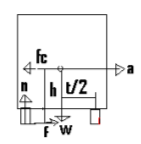

(Figure above is a FBD of a vehicle moving in a circular path with no slipping.)

$f_{c}$ - centrifugal force due to inertia <br>
F - tire friction force <br>
h - vertical distance to CG <br>
t - track width <br>
n - normal force <br>
a - turning acceleration <br>
$n_{i}$ - normal force of inner tire <br>
$n_{o}$ - normal force of outer tire <br>
$\mu$ - coefficient of static friction <br>
w - total weight of car <br>
I - moment of inertia <br>
$\alpha$ - angular acceleration (taken CCW at the contact point of outer tire) 

$ \sum f_{x} = ma  = f_{c} = \frac{mv^{2}}{r} = \frac{wv^{2}}{gr} = f_{i}+f_{o} \leq \mu(n_{i} + n_{o})$

$ \sum f_{y} = n_{i} + n_{o} - w$

$ \sum \tau = I\alpha = f_{c}h - w\frac{t}{2} + n_{i}t $

The inner normal force $n_{i}$ can be any value from 0 to $\frac{w}{2}$. As $f_{c}$ increases, $n_{i}$ decreases from $\frac{w}{2}$ to maintain balance until it reaches 0. While $n_{i}$ is not zero, the $\alpha$ will be zero. When $n_{i}$ is zero, there will be an angular acceleration value $\alpha$ b/c the inner wheel no longer has a normal force i.e. $ \sum \tau = I\alpha = f_{c}h - w\frac{t}{2}$. 

Then $f_{c}h = w\frac{t}{2} = mg\frac{t}{2} $

Finally, 

$a = \frac{\frac{t}{2}}{h}g = s*g = SSF*g$

You want the critical centripetal acceleration to be as large as possible. 
But, it only provides a measure of tendency to BEGIN the rollover, not to actually rollover 

Critical circular speed: $v = \sqrt{r*a} = \sqrt{r*s*g}$

Is the speed to require to lift the inner tire from the road, this speed is dependent on the turning radius 


Another relevant situation for rollover tendency is when the CG is over the contact point of the wheel that is touching the road. (see figure below) 

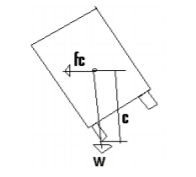

The centrifugal force $f_{c}$ is the only force causing a torque (assuming the car does not slip sideways) 

Any centripetal acceleration would cause the vehicle to rollover. We will use the "critical point" to define the rollover. 

Critical-Point Roll Over Angle: 

$ tan(\theta_{p}) = \frac{\frac{t}{2}}{h} = s = SSF$

You want this angle to be as large as possible. i.ie small h and large t values. 

In [31]:
import math
theta_p = math.degrees(math.atan(SSF))
print("Roll Over Angle [degrees]:",theta_p)

critical_accel = SSF * g 
print("Critical Centripetal Acceleration to begin Roll Over [m/s^2]:",critical_accel)

Roll Over Angle [degrees]: 48.09202376885892
Critical Centripetal Acceleration to begin Roll Over [m/s^2]: 10.930362116991645


Below are Concepts from "Dynamic Stability and Control of Tripped and Untripped Vehicle Rollover" by Zhilin Jin, Bin Li, and Jingxuan Li

We will only focus on untripped vehicle rollover

A rollover resistance rating program was proposed by the NHTSA, which uses the Static Stability Factor (SSF) 

SSF ignores the stiffness and damping of the susepnsion system and tires are ignore. 

Applying a torque balance to one side of the tires you may get: 
$ ma_{y}H-mgsin(\phi_{B})H + F_{zi}T_{w}-\frac{1}{2}mgT_{w}$

$\phi_{B}$ - the road ramp angle <br>
H - height of center of mass <br>
$F_{zi}$ - vertical force of the other side tires <br>
$T_{w}$ - track width <br>

*Assuming road ramp angle is zero and when $F_{zi}$ is zero*
These are conditions at which rollover will occur, then the SSF will be equal to:
$ SSF = \frac{a_{y}}{g} = \frac{T_{w}}{2H}$

However we need a stability factor that can account for the suspension and tire compliance. Thus, we use the Dynamic Stability Factor is DSF. 

Used to detect wheel liftoff conditions when a vehicle is moving. 

$D S F=\frac{T_{w}}{2 H}-\frac{u^{2} m_{s} h^{2} \delta}{L H\left(k_{\phi}-m_{s} h g\right)\left[1-\frac{m u^{2}}{L^{2}}\left(\frac{a}{2 k_{r}}-\frac{b}{2 k_{f}} \cos \delta\right)-\frac{u^{2} m_{s} h\left(c_{f}-c_{r}\right)}{L\left(k_{\phi}-m_{s} h g\right)}\right]}$

DSF Features: 
- Will always be smaller than SSF 
- Will increase with an increased $T_{w}$ and decrease in H 
- Inversely related to the center of gravity, H. 
- Decreasing H improves stability rather than increasing $T_{w}$
- Takes into consideration the longitduinal location of CG 
- Moving CG to front axle improves stability
- Takes into account forward speed and steering angle 
- Decreasing forward speed and steering angle improves stability 
- Takes into account tire properites via ration of front and rear tire stiffness 

Parameters: 
L - wheelbase <br>
u - forward speed <br>
$\delta$ - front wheel steering angle <br>
H - height of CG on vehicle dynamic stability<br>
$k_{\phi}$ - roll stiffness of suspension<br>
$m_{s}$ - sprung mass<br>
a - longitudinal distance to front axle<br>
b - longitudinal distance to rear axle<br>
$c_{f}$ - cornering stiffness value for the front tire<br> 
$c_{r}$ - cornering stiffness value for the rear tire<br> 
h - height of the ROLL CENTER, measured upward from the road<br> 
$k_{r}$ - cornering stiffness coefficient of a rear tire<br> 
$k_{f}$ - cornering stiffness coefficient of a front tire<br> 
$T_{w}$ - track width<br> 
m - total mass of vehicle <br>

! Not too sure of the benefit of this equation as of right now...!

********
Difference between roll center and center of gravity? 
Watch this video: https://www.youtube.com/watch?v=yU2c03KkF6k&ab_channel=EngineeringExplained

Slip Angle? 
Watch this video: https://www.youtube.com/watch?v=9bs2cEyK7Uo&ab_channel=EngineeringExplained

Deriving Car Slip Angles? 
Watch this video: https://www.youtube.com/watch?v=1NTdXhLnA_w&ab_channel=EngineeringExplained

Roll Stiffness
Link: https://suspensionsecrets.co.uk/wheel-rate-and-chassis-roll-stiffness/

*******

We will now identify the key load conditions for our Finite Element Analysis. 

!We assume steady state conditions for all situations! 

There are four situations we will analyze.
- 1G Braking 
- 1G Turning 
- 2G Bump 
- 2G Bump + 1G Braking + 1G Turning (worst case scenario) 

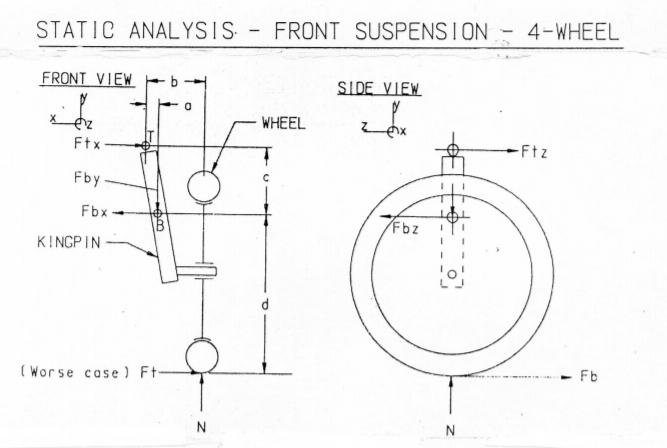

1G Braking 

- The following situation is where the car will be turning (either left or right) with a centripetal acceleration of 1G. This also results in a centrifugal acceleration due to inertial effects. The magnitude for centripetal and centrifugal acceleration are considered the same, 1G acceleration. 

In [32]:
# 1G braking load conditions 

# The assumption is that during braking the front axle will experience an increased normal force due to weight transfer. 
# In contrast, the back axle will experience less load transfer. 
# Thus normal force in back is less than normal force in front. 
front_axle = weight_SI * weight_distribution_front + delta_Wx
back_axle = weight_SI * weight_distribution_back - delta_Wx
print("Front Axle [N]:",front_axle)
print("Back Axle [N]:",back_axle)
print("Front Wheel [N]",front_axle/2)
print("Back Wheel [N]",back_axle/2)

# Also must consider the moment from the brake pads on the upright! 


Front Axle [N]: 1823.9893494542998
Back Axle [N]: 845.8553403657
Front Wheel [N] 911.9946747271499
Back Wheel [N] 422.92767018285


In [33]:
# 1G Turning Conditions 

# The assumption is that during turning the side that is closer to the center of the turning radius will experience a decrease in normal force.
# In contrast, the side of the car is further from the turning radius center will experience an increase in normal force.
# This is all due to centrifugal force caused by the inertia of the vehicle (look at previous figures above)

# For a vehicle turning right 
left_side_normal_force = WL_left
right_side_normal_force = WR_right 
left_side_front_wheel = WL_left * weight_distribution_front
right_side_front_wheel = WR_right * weight_distribution_front
left_side_rear_wheel = WL_left - left_side_front_wheel
right_side_rear_wheel = WR_right - right_side_front_wheel
if left_side_normal_force > 0 and right_side_normal_force >= 0:
    print("Front Right Wheel:",right_side_front_wheel)
    print("Front Left Wheel:",left_side_front_wheel)
    print("Rear Right Wheel:",right_side_rear_wheel)
    print("Rear Left Wheel:",left_side_rear_wheel)
else:
    print("Rollover will occur")


Front Right Wheel: 71.15136098370311
Front Left Wheel: 1317.1678777226969
Rear Right Wheel: 65.67817936957209
Rear Left Wheel: 1215.847271744028


In [34]:
# 2G Bump 
# The assumption that there is no load transfer during ONLY 2G bump analysis. i.e. the vehicle is just rolling at a constant velocity, no acceleration! 
# We will multiply the normal force at each wheel 

front_left_wheel_2G = ((weight_SI * weight_distribution_front)/2) * 2 
front_right_wheel_2G = ((weight_SI * weight_distribution_front)/2) * 2 
rear_left_wheel_2G = ((weight_SI * weight_distribution_back)/2) * 2
rear_right_wheel_2G = ((weight_SI * weight_distribution_back)/2) * 2
print("Front Left Wheel 2G [N]:",front_left_wheel_2G)
print("Front Right Wheel 2G [N]:",front_right_wheel_2G)
print("Rear Left Wheel 2G [N]:",rear_left_wheel_2G)
print("Rear Right Wheel 2G [N]:",rear_right_wheel_2G)

Front Left Wheel 2G [N]: 1388.3192387064
Front Right Wheel 2G [N]: 1388.3192387064
Rear Left Wheel 2G [N]: 1281.5254511136
Rear Right Wheel 2G [N]: 1281.5254511136


In [35]:
# 2G Bump + 1G Turning + 1G Braking 
# This case is the worst case scenario where all three conditions are applied. 

# The initial condition will be considered as the vehicle traveling in a flat path. 
L1 = Fn_front_wheel
R1 = Fn_front_wheel
L2 = Fn_back_wheel
R2 = Fn_back_wheel

# First apply conditions for a 1G turning (lets say turning right!) and the determine the CHANGE in normal force 
# Using the calculated Delta_W 
print("Left Side:",WL_left)
print("Right Side:",WR_right)
left_side_change = delta_W
right_side_change = -delta_W
#assert (WL_left + WR_right) == weight_SI,'WL_left and WR_right normal force do not match total weight of vehicle. Calculation Error!'
if WR_right < 0:
    print("Rollover will occur!") 

# Next apply conditions for a 1G Braking and then determine the CHANGE in normal force 
# Front Axle will experience an increase in normal force compared to rear axle: 
front_axle_change = delta_Wx
rear_axle_change = -delta_Wx
#assert (round(front_axle + back_axle),3) == round(weight_SI,3),'F_Axle and R_Axle normal force do not match total weight of vehicle. Calculation Error!'
print('Front Axle [N]:',front_axle)
print('Rear Axle [N]:',back_axle)
if back_axle < 0:
    print("Rollover will occur!")

# Finally apply conditions for a 2G bump and determine normal force on each wheel 

L1 = (L1 + (front_axle_change*0.5) + left_side_change*0.5)*2
R1 = (R1 + (front_axle_change*0.5) + right_side_change*0.5)*2
L2 = (L2 + (rear_axle_change*0.5) + left_side_change*0.5)*2
R2 = (R2 + (rear_axle_change*0.5) + right_side_change*0.5)*2
print("Front Left Wheel 2G [N]:",L1)
print("Front Right Wheel 2G [N]:",R1)
print("Rear Left Wheel 2G [N]:",L2)
print("Rear Right Wheel 2G [N]:",R2)
#assert (round(L1+L2+R1+R2),3) == round(2*weight_SI,3),'Calculation Error. Normal forces do not equal total weight of vehicle!'

Left Side: 2533.015149466725
Right Side: 136.8295403532752
Front Axle [N]: 1823.9893494542998
Rear Axle [N]: 845.8553403657
Front Left Wheel 2G [N]: 3022.0821540110246
Front Right Wheel 2G [N]: 625.896544897575
Rear Left Wheel 2G [N]: 2043.948144922425
Rear Right Wheel 2G [N]: -352.23746419102474


The next step of the process is to determine the total braking force required to slow the vehicle down at the required minimum deceleration of $4.72 \frac{m}{s^{2}}$ on a wet pavement traveling initially at $50 \frac{km}{hr}$.

It's important to realize there will be an additional loading condition on the front and rear suspension due to braking. The brake pads will induce a moment on the entire assembly! 

The script below calculates all braking related parameters for the solar vehicle. Concepts pulled from "The Winning Solar Car" were used in the calculations. 

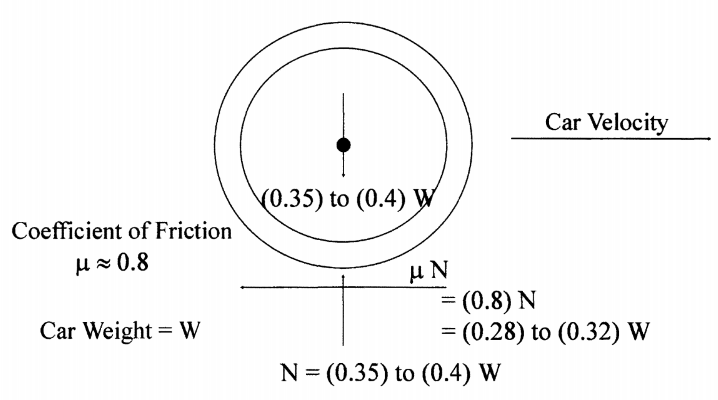



For the following braking calculations. Let's assume the coefficient of friction between the road and the tire is approximately 0.8! 

In [41]:
# Determine the braking force for the current front tire (only the front wheels will do most of the braking!)
# All conditions below will be for a 1G braking, so the normal forces will reflect conditions for weight transfer .i.e more weight on front axle 
# Validate whether current vehicle dimensions (CG location, etc) will enable us to achieve the minimum deceleration

friction_coefficient_road = 0.71
braking_force_front = (front_axle/2) * friction_coefficient_road
print("The braking force for the front wheel (one wheel) [N]:",braking_force_front)
braking_minimum = 4.72 # m/s^2
braking_minimum_g = braking_minimum/9.81 # ~= 0.5 roughly 
minimum_braking_force = braking_minimum_g * weight_SI 
print("The total braking for the front wheels [N]:",braking_force_front*2)
print("The minimum braking force for an acceleration of 4.72 m/s^2 [N]:",minimum_braking_force)
if braking_force_front*2 > minimum_braking_force:
    print("The current vehicle will be able to meet the requirement.")
    print("The current braking in g's is:",(braking_force_front*2)/weight_SI)
else: 
    print("The current vehicle will not be able to meet the requirement.")

# The required braking torque is essentially the moment from the friction force of the wheel with the pavement. 
# Taking moment at the center of the wheel, the torque for a single front wheel is...

torque = braking_force_front * tire_radius 
print("Braking Torque for One Wheel [N*m]:",torque)

The braking force for the front wheel (one wheel) [N]: 647.5162190562764
The total braking for the front wheels [N]: 1295.0324381125529
The minimum braking force for an acceleration of 4.72 m/s^2 [N]: 1284.5735918399998
The current vehicle will be able to meet the requirement.
The current braking in g's is: 0.4850590909090909
Braking Torque for One Wheel [N*m]: 131.57529571223537


The next step is to determine the specific friction force between the pads and the brake rotor. This is possible by utilizing the previous torque value and using a torque relation. 

Essetially, 

$ T_{brake} = T_{rotor} $ 

In our case, since we have to two brake calipers on each front wheel 

$T_{brake} = 2*T_{rotor}$ 

And for each rotor, there are two brake pads. So there will be two normal forces associated for each brake caliper 

$T_{brake} = 2*F_{p}*R_{D}$

The figure below shows an illustration of a sketch. 
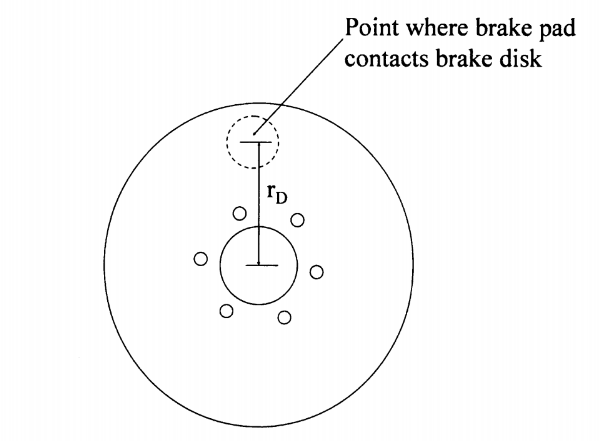

*Disclaimer* 

Since there was no datasheet available for the coefficient of friction of the brake pads, we will use the values provided by "The Winning Solar Car". The book provides a range of values 0.2-0.4. We will assume the worst case scenario of 0.2 for our calculations.   

In [15]:
# The next step is to determine the specific friction force between the pads and the brake rotor 
# The variable rD is essentially the radius from the center of brake rotor to the center of the brake pads. 
rD = 0.088519 # [M]
torque_rotor = torque/2 
friction_force_pads = torque_rotor / (2*rD)
normal_force_pads = friction_force_pads/0.2
print("The normal force required for the brake pads are [N]:",normal_force_pads)

The normal force required for the brake pads are [N]: 2093.531534524304


The final step of the procedure is to determine the hydraulic pressure of our braking system. For our solar vehicle, we will be using a hydraulic system to power our brake calipers. 

After determing the normal force required for the brake pads, we can then calculate the required pressure in the hydraulic system with the following relation. 

$ Pressure = \frac{Force}{Area} $

The area of the brake calipers is determined using the diameter of the piston. 
From the Wilwood Caliper Website (link: https://www.wilwood.com/Calipers/CaliperProd?itemno=120-5750), the piston area is 0.79 in^2.

In [16]:
piston_area = 0.79 
piston_area_SI = piston_area*0.00064516 # [m^2] 
pressure = normal_force_pads / (piston_area_SI)
print("The required pressure for the hydraulic system is [Mpa]:",pressure*1e-6)
print("The required pressure for the hydraulic system is [psi]:",pressure*0.000145038)

The required pressure for the hydraulic system is [Mpa]: 4.107570086675199
The required pressure for the hydraulic system is [psi]: 595.7537502311976


http://www.theoryinpracticeengineering.com/resources/fsae/fsae%20design%20suspension%20components.pdf